In [1]:
"""
This project uses the mnist data set to classify handwritten digits
This project primarily uses uses keras and numpy
This model uses a neural network with 3 Dense layers
This model attains an accuracy of 96%

"""
print("notebook running...")

notebook running...


In [2]:
# Import packages
import numpy as np
import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras_visualizer import visualizer 

In [3]:
# Load test and train data
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [4]:
# Normalize image pixels to be between [-0.5, 0.5] instead of [0, 255]
train_images = (train_images/255) -0.5
test_images = (test_images/ 255) -0.5

# Flatten images 
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [5]:
# Build model with 3 layers
model = Sequential()
model.add(Dense(64, activation= 'relu', input_dim= 784))
model.add(Dense(64, activation= 'sigmoid'))
model.add(Dense(10, activation= 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [6]:
visualizer(model, format='png', view=True)

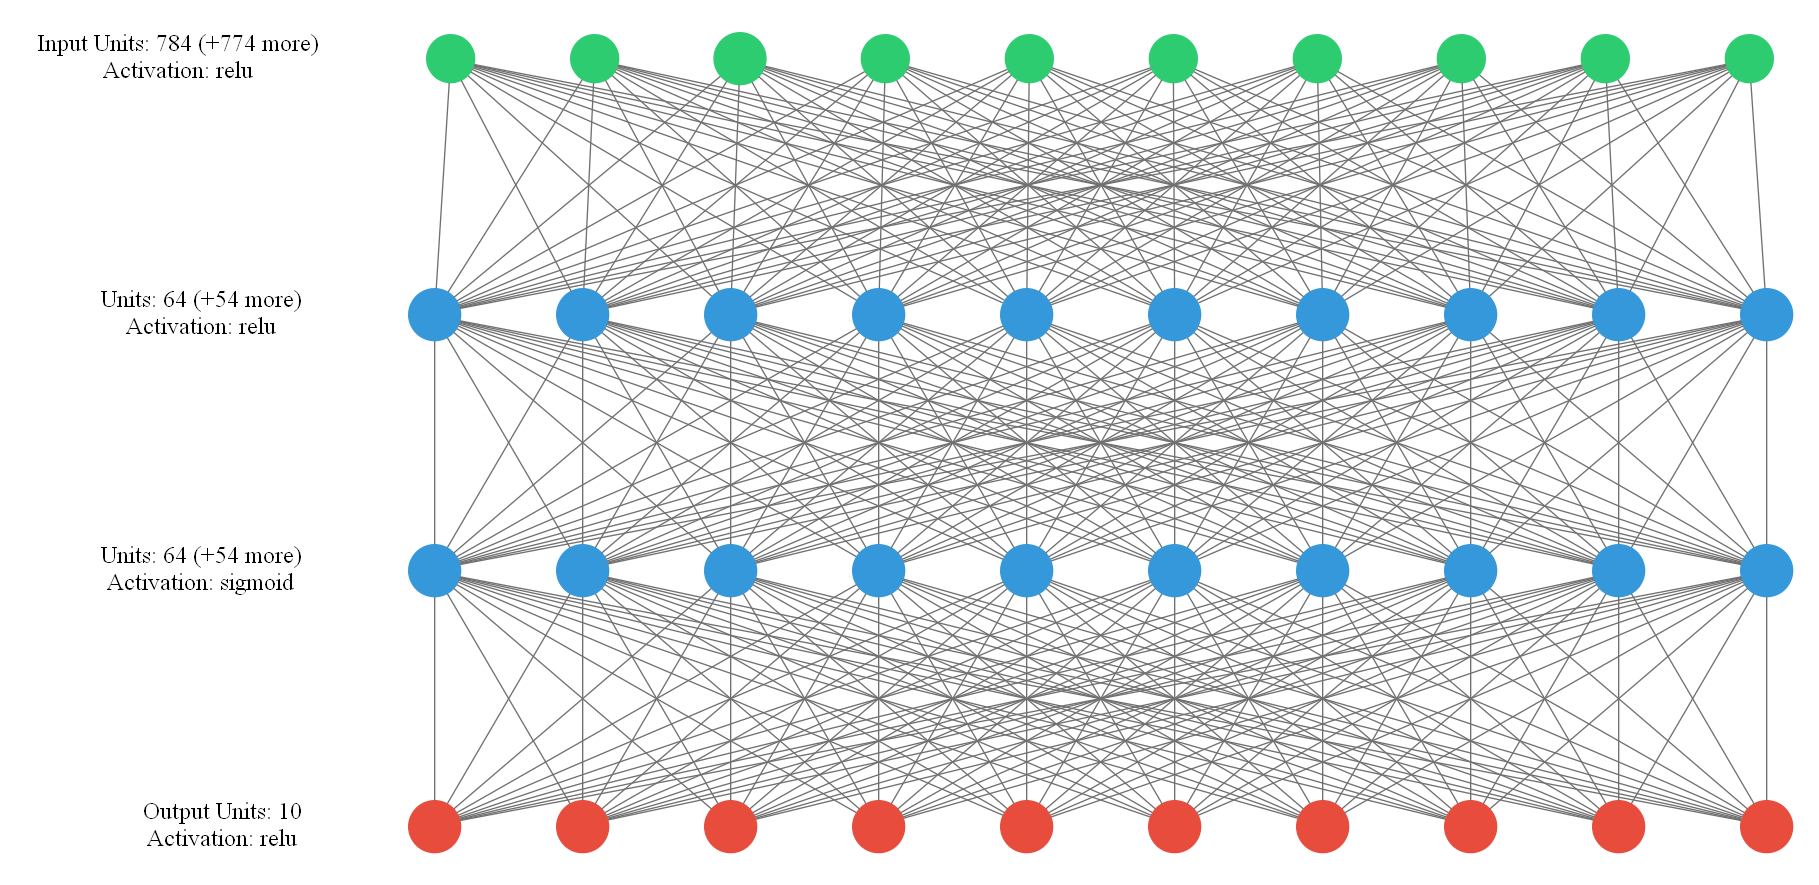

In [7]:
from IPython.display import Image
Image(filename='graph.png') 

In [8]:
# Compile model with optimizer and loss function
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [9]:
# Train model
history = model.fit(
    train_images, 
    to_categorical(train_labels), # converts to 10 D array/ 1 hot encoding
    epochs = 7,
    batch_size = 32,
    validation_split = 0.1
)

Epoch 1/7
1688/1688 [==============================] - 3s 1ms/step - loss: 0.4950 - accuracy: 0.8656 - val_loss: 0.2276 - val_accuracy: 0.9355
Epoch 2/7
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2413 - accuracy: 0.9289 - val_loss: 0.1597 - val_accuracy: 0.9553
Epoch 3/7
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1850 - accuracy: 0.9445 - val_loss: 0.1458 - val_accuracy: 0.9602
Epoch 4/7
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1520 - accuracy: 0.9536 - val_loss: 0.1244 - val_accuracy: 0.9672
Epoch 5/7
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1294 - accuracy: 0.9599 - val_loss: 0.1221 - val_accuracy: 0.9688
Epoch 6/7
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1140 - accuracy: 0.9655 - val_loss: 0.1083 - val_accuracy: 0.9693
Epoch 7/7
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1017 - accuracy: 0.9689 - val_loss: 0.1103 - val_accuracy: 0.9697

In [10]:
# Test model
model.evaluate(
    test_images,
    to_categorical(test_labels)
)

313/313 [==============================] - 0s 1ms/step - loss: 0.1214 - accuracy: 0.9622


[0.12136688083410263, 0.9621999859809875]

In [11]:
#model.save_weights('model.h5')

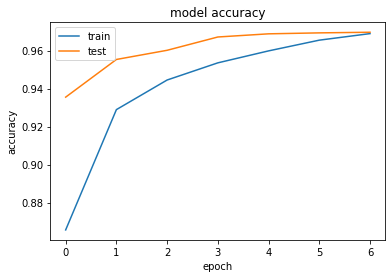

In [12]:
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

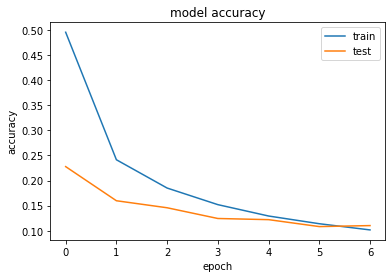

In [13]:
# Model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [14]:
# predictions on first 10 test images
predictions = model.predict(test_images[:20])
print(np.argmax(predictions, axis = 1))
print(test_labels[:20])

[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


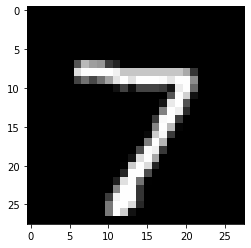

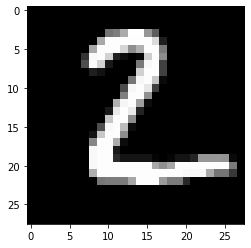

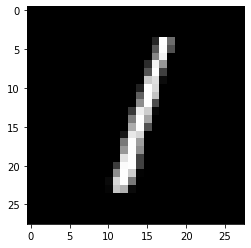

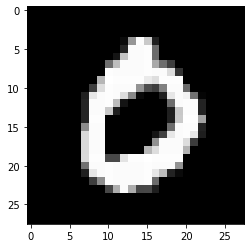

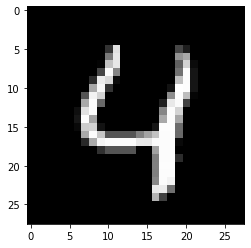

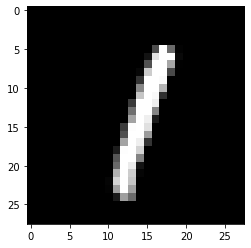

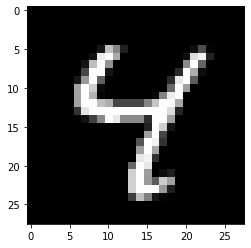

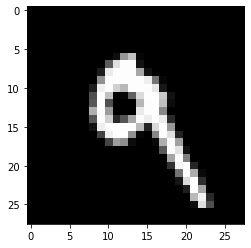

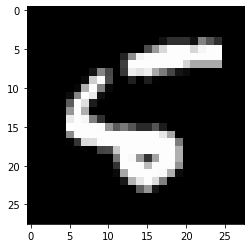

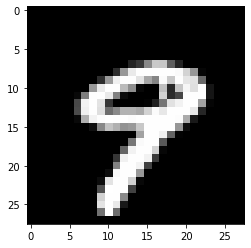

In [15]:
# Print some images
for i in range (0, 10):
    image = test_images[i]
    image = np.array(image, dtype= 'float')
    pixels = image.reshape((28,28))
    plt.imshow(pixels, cmap = 'gray')
    plt.show()
    